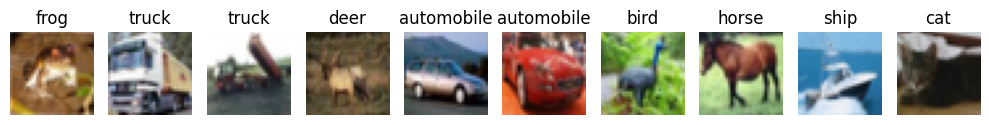

In [1]:
#importing dataset and performing nessessary pre - processing
import numpy as np
import matplotlib.pyplot as plt
import pickle

def unpickle(file):
    with open(file, 'rb') as fo:
        dict = pickle.load(fo, encoding='bytes')
    return dict

def load_cifar10(root_dir):
    # Load training data
    train_images = []
    train_labels = []
    for i in range(1, 6):
        file_path = f'{root_dir}/data_batch_{i}'
        batch_dict = unpickle(file_path)
        train_images.append(batch_dict[b'data'])
        train_labels += batch_dict[b'labels']

    # Load test data
    test_dict = unpickle(f'{root_dir}/test_batch')
    test_images = test_dict[b'data']
    test_labels = test_dict[b'labels']

    # Concatenate and reshape the data
    x_train = np.concatenate(train_images).reshape(-1, 3, 32, 32).transpose(0, 2, 3, 1)
    y_train = np.array(train_labels)
    x_test = test_images.reshape(-1, 3, 32, 32).transpose(0, 2, 3, 1)
    y_test = np.array(test_labels)

    return x_train, y_train, x_test, y_test

# Set the root directory where the CIFAR-10 dataset files are stored in Google Colab
root_dir = "/content"

# Load CIFAR-10 dataset
x_train, y_train, x_test, y_test = load_cifar10(root_dir)

# Normalize pixel values (0-255) to range 0-1
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

# Convert class labels to one-hot encoded vectors
num_classes = 10
y_train_one_hot = np.eye(num_classes)[y_train]
y_test_one_hot = np.eye(num_classes)[y_test]

# Display sample images
num_samples = 10  # Number of images to display
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']

plt.figure(figsize=(10, 2))
for i in range(num_samples):
    plt.subplot(1, num_samples, i+1)
    plt.imshow(x_train[i])
    plt.title(class_names[y_train[i]])
    plt.axis('off')

plt.tight_layout()
plt.show()

In [2]:
#assigning different validation sets.
from sklearn.model_selection import train_test_split, KFold, LeaveOneOut

# Load CIFAR-10 dataset
# Assume load_cifar10 function loads the CIFAR-10 dataset

def load_cifar10_subset(root_dir, subset_size):
    # Load the entire CIFAR-10 dataset
    x_train, y_train, x_test, y_test = load_cifar10(root_dir)

    # Select a subset of the data
    x_train_subset = x_train[:subset_size].copy()
    y_train_subset = y_train[:subset_size].copy()

    return x_train_subset, y_train_subset

# Define the subset size
subset_size = 1000  # Adjust this as needed

# Load a subset of CIFAR-10 dataset
x_train_subset, y_train_subset = load_cifar10_subset(root_dir, subset_size)

# Shuffle the data
random_state = 42
np.random.seed(random_state)
shuffle_index = np.random.permutation(subset_size)
x_train_subset = x_train_subset[shuffle_index].copy()
y_train_subset = y_train_subset[shuffle_index].copy()

# a) No validation set
x_train_no_val = x_train_subset.copy()
y_train_no_val = y_train_subset.copy()

# b) 1 validation set with 20% of 80%
x_train_80, x_val, y_train_80, y_val = train_test_split(
    x_train_subset, y_train_subset, test_size=0.2, random_state=random_state)

# c) 3-fold cross-validation set
kfold = KFold(n_splits=3, shuffle=True, random_state=random_state)
cv_splits_3fold = list(kfold.split(x_train_subset.copy()))

# d) 5-fold cross-validation set
kfold = KFold(n_splits=5, shuffle=True, random_state=random_state)
cv_splits_5fold = list(kfold.split(x_train_subset.copy()))

# e) 10-fold cross-validation set
kfold = KFold(n_splits=10, shuffle=True, random_state=random_state)
cv_splits_10fold = list(kfold.split(x_train_subset.copy()))

# f) Leave one out cross-validation set
loo = LeaveOneOut()
cv_splits_loo = list(loo.split(x_train_subset.copy()))

# Print the sizes of different sets
print("No Validation Set:")
print("Training set size:", len(x_train_no_val))

print("\n1 Validation Set with 20% of 80%:")
print("Training set size:", len(x_train_80))
print("Validation set size:", len(x_val))

print("\n3-fold Cross-Validation Set:")
print("Training set size:", len(x_train_subset))
for fold, (train_idx, val_idx) in enumerate(cv_splits_3fold):
    print("Fold", fold+1)
    print("  Train set size:", len(train_idx))
    print("  Validation set size:", len(val_idx))

print("\n5-fold Cross-Validation Set:")
print("Training set size:", len(x_train_subset))
for fold, (train_idx, val_idx) in enumerate(cv_splits_5fold):
    print("Fold", fold+1)
    print("  Train set size:", len(train_idx))
    print("  Validation set size:", len(val_idx))

print("\n10-fold Cross-Validation Set:")
print("Training set size:", len(x_train_subset))
for fold, (train_idx, val_idx) in enumerate(cv_splits_10fold):
    print("Fold", fold+1)
    print("  Train set size:", len(train_idx))
    print("  Validation set size:", len(val_idx))

print("\nLeave One Out Cross-Validation Set:")
print("Training set size:", len(x_train_subset))
print("Validation set size:", len(cv_splits_loo))

No Validation Set:
Training set size: 1000

1 Validation Set with 20% of 80%:
Training set size: 800
Validation set size: 200

3-fold Cross-Validation Set:
Training set size: 1000
Fold 1
  Train set size: 666
  Validation set size: 334
Fold 2
  Train set size: 667
  Validation set size: 333
Fold 3
  Train set size: 667
  Validation set size: 333

5-fold Cross-Validation Set:
Training set size: 1000
Fold 1
  Train set size: 800
  Validation set size: 200
Fold 2
  Train set size: 800
  Validation set size: 200
Fold 3
  Train set size: 800
  Validation set size: 200
Fold 4
  Train set size: 800
  Validation set size: 200
Fold 5
  Train set size: 800
  Validation set size: 200

10-fold Cross-Validation Set:
Training set size: 1000
Fold 1
  Train set size: 900
  Validation set size: 100
Fold 2
  Train set size: 900
  Validation set size: 100
Fold 3
  Train set size: 900
  Validation set size: 100
Fold 4
  Train set size: 900
  Validation set size: 100
Fold 5
  Train set size: 900
  Validati

In [8]:
#model training (CNN model was used in this assignmnt:)
import tensorflow as tf
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report
import numpy as np

# Load the CIFAR-10 dataset
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

# Normalize the pixel values
x_train = x_train / 255.0
x_test = x_test / 255.0

# Define the model architecture
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
model.add(MaxPooling2D((2, 2)))
model.add(Flatten())
model.add(Dense(10, activation='softmax'))

# Compile the model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(x_train, y_train, epochs=10, batch_size=32, validation_data=(x_test, y_test))

# Evaluate the model on the test set
y_pred = model.predict(x_test)
y_pred_labels = np.argmax(y_pred, axis=1)
y_true_labels = np.squeeze(y_test)



Epoch 1/10
1563/1563 [==============================] - 42s 26ms/step - loss: 1.4830 - accuracy: 0.4774 - val_loss: 1.2872 - val_accuracy: 0.5415
Epoch 2/10
1563/1563 [==============================] - 43s 28ms/step - loss: 1.2248 - accuracy: 0.5745 - val_loss: 1.1814 - val_accuracy: 0.5849
Epoch 3/10
1563/1563 [==============================] - 38s 24ms/step - loss: 1.1124 - accuracy: 0.6151 - val_loss: 1.1451 - val_accuracy: 0.6017
Epoch 4/10
1563/1563 [==============================] - 38s 24ms/step - loss: 1.0398 - accuracy: 0.6392 - val_loss: 1.1658 - val_accuracy: 0.5893
Epoch 5/10
1563/1563 [==============================] - 38s 24ms/step - loss: 0.9820 - accuracy: 0.6601 - val_loss: 1.0858 - val_accuracy: 0.6262
Epoch 6/10
1563/1563 [==============================] - 38s 24ms/step - loss: 0.9379 - accuracy: 0.6771 - val_loss: 1.0527 - val_accuracy: 0.6366
Epoch 7/10
1563/1563 [==============================] - 37s 24ms/step - loss: 0.9041 - accuracy: 0.6864 - val_loss: 1.0968 -

313/313 [==============================] - 2s 8ms/step


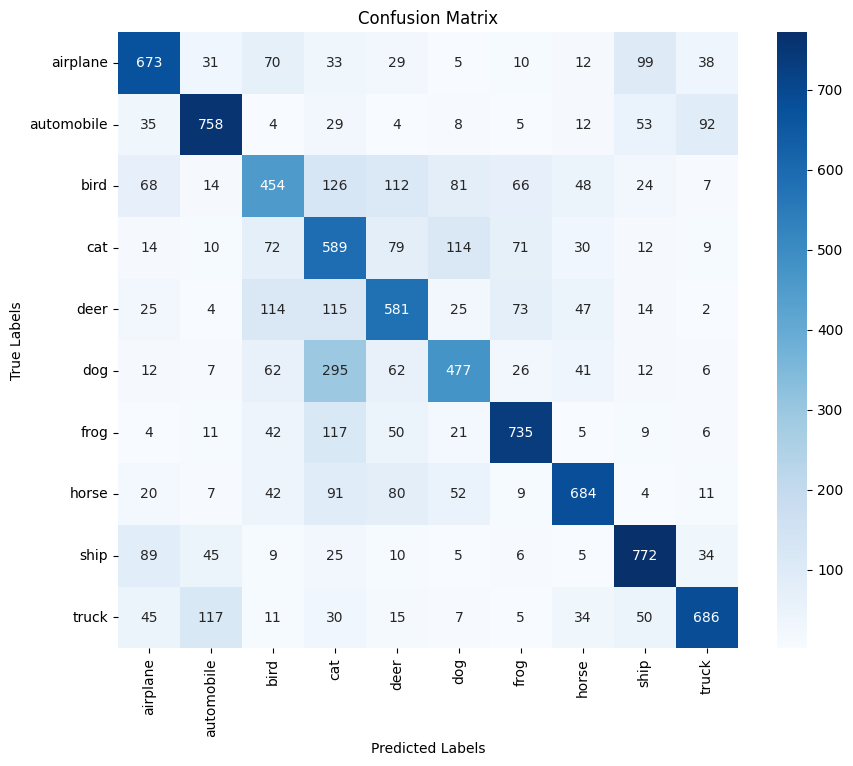

Classification Report:
              precision    recall  f1-score   support

    airplane       0.68      0.67      0.68      1000
  automobile       0.75      0.76      0.76      1000
        bird       0.52      0.45      0.48      1000
         cat       0.41      0.59      0.48      1000
        deer       0.57      0.58      0.57      1000
         dog       0.60      0.48      0.53      1000
        frog       0.73      0.73      0.73      1000
       horse       0.75      0.68      0.71      1000
        ship       0.74      0.77      0.75      1000
       truck       0.77      0.69      0.73      1000

    accuracy                           0.64     10000
   macro avg       0.65      0.64      0.64     10000
weighted avg       0.65      0.64      0.64     10000



In [7]:
#model evaluation
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report
from tensorflow.keras.datasets import cifar10

# Load the CIFAR-10 dataset
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

# Normalize the pixel values
x_train = x_train / 255.0
x_test = x_test / 255.0

# Assuming you have a trained model 'model'

# Make predictions on the test set
y_pred = model.predict(x_test)
y_pred_labels = np.argmax(y_pred, axis=1)
y_true_labels = np.squeeze(y_test)

# Generate the confusion matrix
cm = confusion_matrix(y_true_labels, y_pred_labels)

# Plot the confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, cmap='Blues', fmt='d', xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

# Generate classification report for each class
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']
report = classification_report(y_true_labels, y_pred_labels, target_names=class_names)
print("Classification Report:")
print(report)

In [6]:
#comparision between colar images and grayscale image
import numpy as np
from skimage.color import rgb2gray
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from sklearn.metrics import classification_report, accuracy_score

# Load the CIFAR-10 dataset
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

# Convert color images to grayscale
x_train_gray = rgb2gray(x_train)
x_test_gray = rgb2gray(x_test)

# Reshape grayscale images to match the input shape of the model
x_train_gray = x_train_gray.reshape(x_train_gray.shape + (1,))
x_test_gray = x_test_gray.reshape(x_test_gray.shape + (1,))

# Normalize the pixel values
x_train_gray = x_train_gray / 255.0
x_test_gray = x_test_gray / 255.0

# Define the model architecture for grayscale images
model_gray = Sequential()
model_gray.add(Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 1)))
model_gray.add(MaxPooling2D((2, 2)))
model_gray.add(Flatten())
model_gray.add(Dense(10, activation='softmax'))

# Compile the model
model_gray.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train the model on grayscale images
model_gray.fit(x_train_gray, y_train, epochs=10, batch_size=32, validation_data=(x_test_gray, y_test))

# Evaluate the model on grayscale images
y_pred_gray = model_gray.predict(x_test_gray)
y_pred_labels_gray = np.argmax(y_pred_gray, axis=1)
y_true_labels = np.squeeze(y_test)

# Calculate accuracy on grayscale images
accuracy_gray = accuracy_score(y_true_labels, y_pred_labels_gray)
print("Accuracy on grayscale images:", accuracy_gray)

# Evaluate the model on color images (baseline)
y_pred = model.predict(x_test)
y_pred_labels = np.argmax(y_pred, axis=1)

# Calculate accuracy on color images (baseline)
accuracy_baseline = accuracy_score(y_true_labels, y_pred_labels)
print("Accuracy on color images (baseline):", accuracy_baseline)

# Compare the performance
if accuracy_gray > accuracy_baseline:
    print("Grayscale images outperform color images.")
elif accuracy_gray < accuracy_baseline:
    print("Color images outperform grayscale images.")
else:
    print("Grayscale images and color images perform equally.")

# Generate classification report for grayscale images
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']
report_gray = classification_report(y_true_labels, y_pred_labels_gray, target_names=class_names)
print("Classification Report on grayscale images:")
print(report_gray)

# Generate classification report for color images (baseline)
report_baseline = classification_report(y_true_labels, y_pred_labels, target_names=class_names)
print("Classification Report on color images (baseline):")
print(report_baseline)

Epoch 1/10
1563/1563 [==============================] - 39s 25ms/step - loss: 2.2580 - accuracy: 0.1760 - val_loss: 2.1796 - val_accuracy: 0.2461
Epoch 2/10
1563/1563 [==============================] - 30s 19ms/step - loss: 2.1324 - accuracy: 0.2525 - val_loss: 2.1041 - val_accuracy: 0.2707
Epoch 3/10
1563/1563 [==============================] - 31s 20ms/step - loss: 2.0854 - accuracy: 0.2736 - val_loss: 2.0754 - val_accuracy: 0.2855
Epoch 4/10
1563/1563 [==============================] - 33s 21ms/step - loss: 2.0610 - accuracy: 0.2833 - val_loss: 2.0555 - val_accuracy: 0.2902
Epoch 5/10
1563/1563 [==============================] - 31s 20ms/step - loss: 2.0450 - accuracy: 0.2896 - val_loss: 2.0435 - val_accuracy: 0.2891
Epoch 6/10
1563/1563 [==============================] - 32s 20ms/step - loss: 2.0334 - accuracy: 0.2922 - val_loss: 2.0342 - val_accuracy: 0.2960
Epoch 7/10
1563/1563 [==============================] - 31s 20ms/step - loss: 2.0248 - accuracy: 0.2941 - val_loss: 2.0263 -

Epoch 1/10
1563/1563 [==============================] - 50s 31ms/step - loss: 2.3028 - accuracy: 0.0987 - val_loss: 2.3026 - val_accuracy: 0.1000
Epoch 2/10
1563/1563 [==============================] - 30s 19ms/step - loss: 2.3028 - accuracy: 0.0985 - val_loss: 2.3026 - val_accuracy: 0.1000
Epoch 3/10
1563/1563 [==============================] - 34s 22ms/step - loss: 2.3028 - accuracy: 0.0967 - val_loss: 2.3026 - val_accuracy: 0.1000
Epoch 4/10
1563/1563 [==============================] - 32s 20ms/step - loss: 2.3028 - accuracy: 0.1001 - val_loss: 2.3027 - val_accuracy: 0.1000
Epoch 5/10
1563/1563 [==============================] - 33s 21ms/step - loss: 2.3028 - accuracy: 0.0991 - val_loss: 2.3026 - val_accuracy: 0.1000
Epoch 6/10
1563/1563 [==============================] - 30s 19ms/step - loss: 2.3028 - accuracy: 0.0981 - val_loss: 2.3026 - val_accuracy: 0.1000
Epoch 7/10
1563/1563 [==============================] - 31s 20ms/step - loss: 2.3028 - accuracy: 0.0971 - val_loss: 2.3026 -

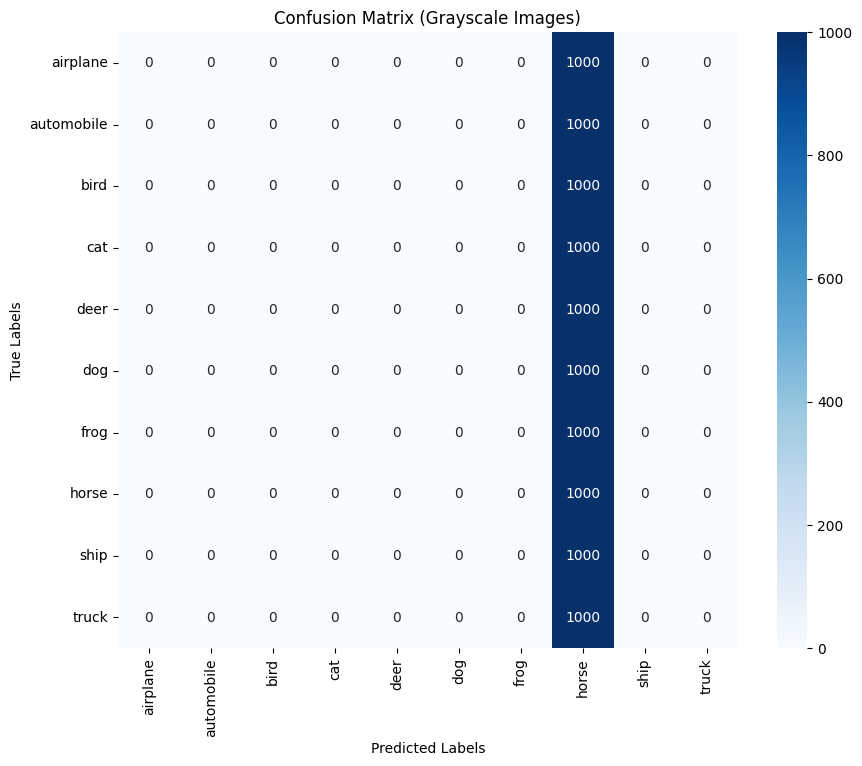

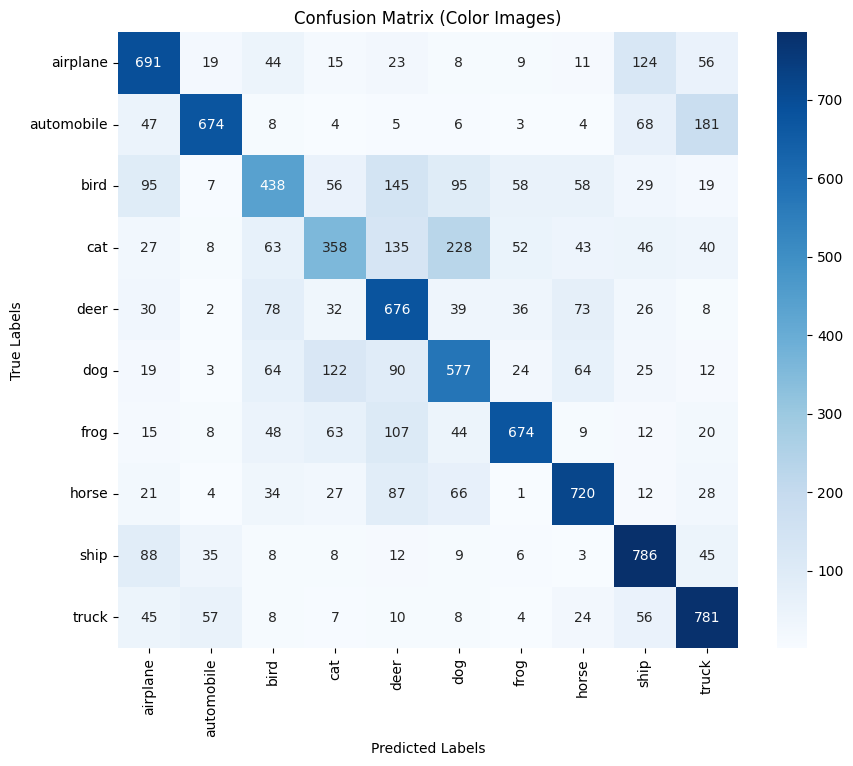

Classification Report on grayscale images:
              precision    recall  f1-score   support

    airplane       0.00      0.00      0.00      1000
  automobile       0.00      0.00      0.00      1000
        bird       0.00      0.00      0.00      1000
         cat       0.00      0.00      0.00      1000
        deer       0.00      0.00      0.00      1000
         dog       0.00      0.00      0.00      1000
        frog       0.00      0.00      0.00      1000
       horse       0.10      1.00      0.18      1000
        ship       0.00      0.00      0.00      1000
       truck       0.00      0.00      0.00      1000

    accuracy                           0.10     10000
   macro avg       0.01      0.10      0.02     10000
weighted avg       0.01      0.10      0.02     10000

Classification Report on color images (baseline):
              precision    recall  f1-score   support

    airplane       0.64      0.69      0.67      1000
  automobile       0.82      0.67      

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [9]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from skimage.color import rgb2gray
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

# Load the CIFAR-10 dataset
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

# Convert color images to grayscale
x_train_gray = rgb2gray(x_train)
x_test_gray = rgb2gray(x_test)

# Reshape grayscale images to match the input shape of the model
x_train_gray = x_train_gray.reshape(x_train_gray.shape + (1,))
x_test_gray = x_test_gray.reshape(x_test_gray.shape + (1,))

# Normalize the pixel values
x_train_gray = x_train_gray / 255.0
x_test_gray = x_test_gray / 255.0
x_train = x_train / 255.0
x_test = x_test / 255.0

# Define the model architecture for grayscale images
model_gray = Sequential()
model_gray.add(Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 1)))
model_gray.add(MaxPooling2D((2, 2)))
model_gray.add(Flatten())
model_gray.add(Dense(10, activation='softmax'))

# Define the model architecture for color images (baseline)
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
model.add(MaxPooling2D((2, 2)))
model.add(Flatten())
model.add(Dense(10, activation='softmax'))

# Compile the models
model_gray.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train the models
model_gray.fit(x_train_gray, y_train, epochs=10, batch_size=32, validation_data=(x_test_gray, y_test))
model.fit(x_train, y_train, epochs=10, batch_size=32, validation_data=(x_test, y_test))

# Evaluate the models on grayscale images
y_pred_gray = model_gray.predict(x_test_gray)
y_pred_labels_gray = np.argmax(y_pred_gray, axis=1)
y_true_labels = np.squeeze(y_test)

# Evaluate the models on color images (baseline)
y_pred = model.predict(x_test)
y_pred_labels = np.argmax(y_pred, axis=1)

# Calculate accuracy on grayscale images
accuracy_gray = accuracy_score(y_true_labels, y_pred_labels_gray)
print("Accuracy on grayscale images:", accuracy_gray)

# Calculate accuracy on color images (baseline)
accuracy_baseline = accuracy_score(y_true_labels, y_pred_labels)
print("Accuracy on color images (baseline):", accuracy_baseline)

# Compare the performance
if accuracy_gray > accuracy_baseline:
    print("Grayscale images outperform color images.")
elif accuracy_gray < accuracy_baseline:
    print("Color images outperform grayscale images.")
else:
    print("Grayscale images and color images perform equally.")

# Generate the confusion matrix for grayscale images
cm_gray = confusion_matrix(y_true_labels, y_pred_labels_gray)

# Generate the confusion matrix for color images (baseline)
cm_baseline = confusion_matrix(y_true_labels, y_pred_labels)

# Plot the confusion matrix for grayscale images
plt.figure(figsize=(10, 8))
sns.heatmap(cm_gray, annot=True, cmap='Blues', fmt='d', xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix (Grayscale Images)')
plt.show()

# Plot the confusion matrix for color images (baseline)
plt.figure(figsize=(10, 8))
sns.heatmap(cm_baseline, annot=True, cmap='Blues', fmt='d', xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix (Color Images)')
plt.show()

# Generate classification report for grayscale images
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']
report_gray = classification_report(y_true_labels, y_pred_labels_gray, target_names=class_names)
print("Classification Report on grayscale images:")
print(report_gray)

# Generate classification report for color images (baseline)
report_baseline = classification_report(y_true_labels, y_pred_labels, target_names=class_names)
print("Classification Report on color images (baseline):")
print(report_baseline)